# Project: TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
A Udacity Nano Degree Dataset fetched from Kaggale. This data set is packed with information about 10,000 movies collected from the IMDb Movie Data set (TMDb). It consist of 21 columns such as revenue, budget popoularity etc. 


### Question(s) for Analysis
We'll be looking at: 

 1. What are the most popular genres over the years?
 2. Do movies with higher budget genarate more revenue? 
 3. Who's the director with the highest movie production?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [10]:
!pip install --upgrade explode

Requirement already up-to-date: explode in /opt/conda/lib/python3.6/site-packages (1.0.6)


<a id='wrangling'></a>
## Data Wrangling

Here we will observe and inspect the dataset and then eliminate and clean it in accordance to what we're going to need to answer the above questions. 

In [3]:
# Load and inspect the data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Confirm the size of the dataset
df.shape

(10866, 21)

In [5]:
# Learn more about some statistical values 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Check for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### The dataset has a lot of missing values, however, our analysis will mostly concentrate on the more complete columns, such as popularity and genres. Though this will reduce the accuracy of our analysis, it will not make too far above the desired outcome.


### Data Cleaning
* We will first of all drop columns that are not useful to our analysis

In [7]:
# Now we drop the irrelevant columns from the dataset

df.drop(df.loc[:,['imdb_id','tagline','homepage','production_companies','overview','cast','keywords']], axis=1)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [8]:
# Drop the missing value from the genres column
df.dropna(how='any', subset=['genres'], inplace = True)

# Cross check
df.isnull().sum()

id                         0
imdb_id                    8
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      75
homepage                7912
director                  42
tagline                 2806
keywords                1475
overview                   3
runtime                    0
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

* We need only to drop missing values from our most relevant data (genre). This will give us a more accurate analysis moving forward.

In [9]:
#No duplicates here :)
df.duplicated().sum()

1

* Having only one duplicate will not have any impact on accuracy of our analysis. We now move to the next phase and check all data columns info

In [10]:
# All relevant columns have no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 21 columns):
id                      10843 non-null int64
imdb_id                 10835 non-null object
popularity              10843 non-null float64
budget                  10843 non-null int64
revenue                 10843 non-null int64
original_title          10843 non-null object
cast                    10768 non-null object
homepage                2931 non-null object
director                10801 non-null object
tagline                 8037 non-null object
keywords                9368 non-null object
overview                10840 non-null object
runtime                 10843 non-null int64
genres                  10843 non-null object
production_companies    9827 non-null object
release_date            10843 non-null object
vote_count              10843 non-null int64
vote_average            10843 non-null float64
release_year            10843 non-null int64
budget_adj              1

# Exploratory Data Analysis

## Research Question 1: What are the most popular genres over the years?¶

### Observation: On the genres column, there are movies that have more than one genre, in that case, we will use all genres of each movie to make the analysis more accurate.

In [11]:
# First we need to duplicate the dataset
df_g = df.copy()

# Covert "genres" dtype to string 
df_g = df_g.genres.astype('str')

In [12]:
# Now lets look at the popularity stats
df['popularity'].describe()

count    10843.000000
mean         0.647456
std          1.000986
min          0.000065
25%          0.208253
50%          0.384555
75%          0.715349
max         32.985763
Name: popularity, dtype: float64

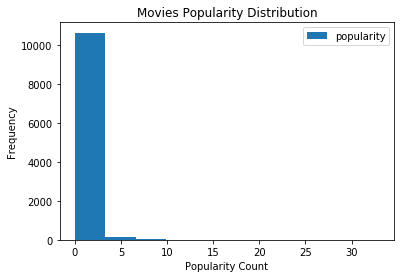

In [21]:
# Lets see the popularity distribution using a histogram
df.popularity.plot(kind='hist')
plt.title('Movies Popularity Distribution')
plt.xlabel('Popularity Count')
plt.ylabel('Frequency')
plt.legend();

In [24]:
# Next, we need to split the genre column
df_g.genres = df_g.str.split('|')
df_g.head(10)

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
5             Western|Drama|Adventure|Thriller
6    Science Fiction|Action|Thriller|Adventure
7              Drama|Adventure|Science Fiction
8            Family|Animation|Adventure|Comedy
9                      Comedy|Animation|Family
Name: genres, dtype: object

In [25]:
# we calculate the popularity of each genre 
genres_count = df.groupby(['release_year','genres'], as_index=False)['popularity'].mean()
genres_count.head()

,release_year,genres,popularity
0,1960,Action|Adventure|Drama|History|Western,0.310398
1,1960,Action|Adventure|Western,1.872132
2,1960,Action|Drama|Foreign|History|War,0.194948
3,1960,Action|Drama|History,1.136943
4,1960,Action|Drama|History|War,0.256779


In [17]:
# group the dataframes to find the most populare genre over the years
x = genres_count.groupby('release_year').agg({'popularity':'max'})
x.head()

,popularity
release_year,
1960,2.610362
1961,2.631987
1962,3.170651
1963,2.508235
1964,3.153791


In [23]:
# join the two dataframes together
new = genres_count.merge(x, how='inner', right_on='popularity', left_on='popularity')
new.head()

,release_year,genres,popularity
0,1960,Drama|Horror|Thriller,2.610362
1,1961,Adventure|Animation|Comedy|Family,2.631987
2,1962,Adventure|Action|Thriller,3.170651
3,1963,Action|Thriller|Adventure,2.508235
4,1964,Adventure|Action|Thriller,3.153791


In [24]:
# tidy up the data by removing extra row index by reset index
data = df_g.reset_index(level=0, drop=True)
# change the pandas series to pandas dataframe
data = data.reset_index()
data.head()

,index,genres
0,0,Action|Adventure|Science Fiction|Thriller
1,1,Action|Adventure|Science Fiction|Thriller
2,2,Adventure|Science Fiction|Thriller
3,3,Action|Adventure|Science Fiction|Fantasy
4,4,Action|Crime|Thriller


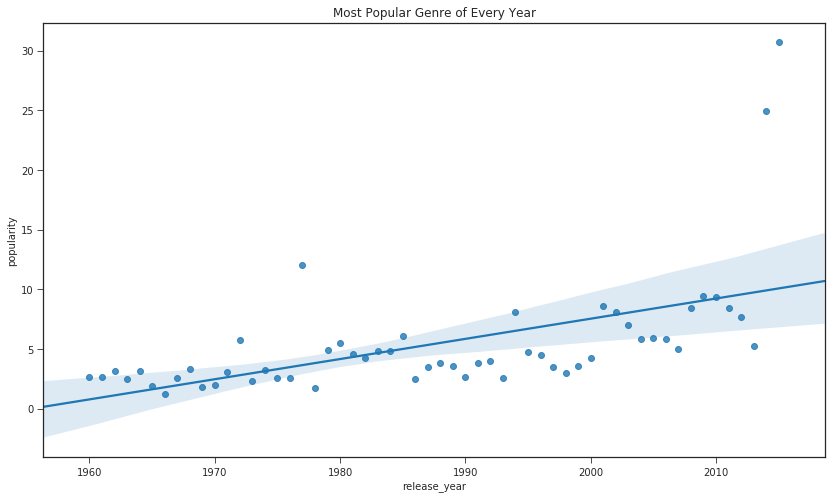

In [28]:
# set chart dimension
plt.figure(figsize=(14,8))

# set plotting style
sns.set_style('ticks') 

# set title
plt.title('Most Popular Genre of Every Year')
plt.xlabel('Movie Release Year')
plt.ylabel('Popularity')

#draw scatter plot 
sns.regplot(x="release_year", y="popularity", data=new)

#move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

In [26]:
df.genres.value_counts().sort_values(ascending=False)[:5]

Comedy           712
Drama            712
Documentary      312
Drama|Romance    289
Comedy|Drama     280
Name: genres, dtype: int64

### Here, we can see that there is no consistently dominating genre over the years, however, Drama and Comedy have the highest popularity followed by documentary.

# Research Question 2 :
 ### Do Movies with higher budget generate more revenue?

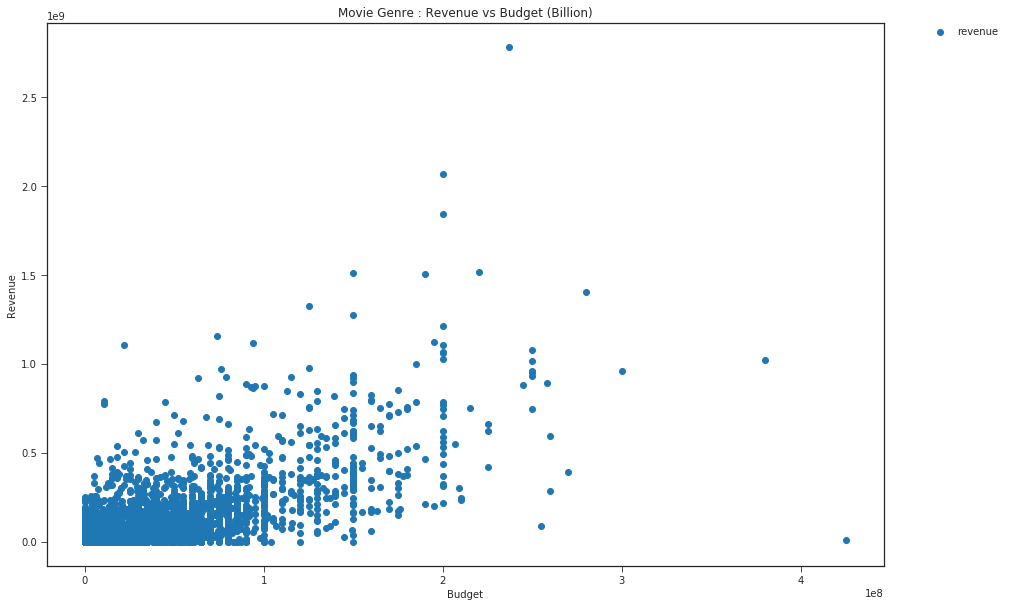

In [27]:
# set chart dimension
plt.figure(figsize=(15,10))

# set plotting style
sns.set_style('ticks') 

# set title
plt.title('Movie Genre : Revenue vs Budget (Billion)')
plt.xlabel('Budget')
plt.ylabel('Revenue')

# draw scatter plot
plt.scatter(x="budget", y="revenue", data=df);

# move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

* From the above scatter plot, we can see a strong positive correlation between budget and revenue.
* It is clear therefore, that the movies with higher budgets tends to be higher revenue generators.

# Research Question 3:
 ### Who's the director with the highest movie production?

In [23]:
df['director'].value_counts().head(10)

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: director, dtype: int64

In [50]:
def top_director(name):
    print('Top producing Director is', name)
   

In [52]:
top_director('Woody Allen')

Top producing Director is Woody Allen


### The Director with the highest movie production is Woody Allen, with a total of 45 movies produced.

<a id='conclusions'></a>
## Conclusions

### Project Summary:
#### From our Analysis, we looked at the most popular genres over the years and found out that though there's a limit to the accuracy of our analysis, we were able to see that Dram and Comedy are the two most popular genres according to this dataset.
#### Next, we looked at the relationship between Budget and Revenue, with the help of a scatter plot, we concluded that movies with higher budgets are more likely to generate higher revenues.
#### Lastly we found out the Director with the highest movie production, he goes by the name Woody Allen.


## Data Limitations: 
### We have queit a number of limitations on this dataset
* There are more than 5000 columns with a negative number in the budget colunm 
* Almost every movie have different genre, so it was tricky to get the values right
* Lack of details on many of the columns 


In [138]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0